In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import math
import os
import sys
from ggw import *
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D
%matplotlib widget
%matplotlib inline

In [2]:
data_2_path = '/Users/a1/Tugas Vera/Year 4 Fall/MATH 4995/MNIST Sign Language/MNIST_number/number_2.csv'
data_5_path = '/Users/a1/Tugas Vera/Year 4 Fall/MATH 4995/MNIST Sign Language/MNIST_number/number_5.csv'
data_0_path = '/Users/a1/Tugas Vera/Year 4 Fall/MATH 4995/MNIST Sign Language/MNIST_number/number_0.csv'
data_8_path = '/Users/a1/Tugas Vera/Year 4 Fall/MATH 4995/MNIST Sign Language/MNIST_number/number_8.csv'


df_2 = pd.read_csv(data_2_path,encoding='latin-1', header=None) 
# print(df_2.head(10))

df_5 = pd.read_csv(data_5_path,encoding='latin-1', header=None) 
# print(df_5.head(10))

df_0 = pd.read_csv(data_0_path,encoding='latin-1', header=None) 
print(df_0.head(10))

df_8 = pd.read_csv(data_8_path,encoding='latin-1', header=None) 
print(df_8.head(10))

       0   1
0  ï»¿18   6
1     20   9
2     19  11
3     12   6
4     15   9
5     13   7
6     12  23
7      9  21
8     20  16
9     13  16
       0   1
0  ï»¿15  11
1     23  16
2     23  14
3      9  21
4     22  16
5      9  17
6     19   6
7     10  15
8     16  14
9      6   7


In [3]:
df_2.iloc[0,0] = 10
df_2.columns = ['x','y']
df_2['x'] = df_2['x'].astype(int)
df_2.dtypes

df_5.iloc[0,0] = 6
df_5.columns = ['x','y']
df_5['x'] = df_5['x'].astype(int)
df_5.dtypes

df_0.iloc[0,0] = 18
df_0.columns = ['x','y']
df_0['x'] = df_0['x'].astype(int)
df_0.dtypes

df_8.iloc[0,0] = 15
df_8.columns = ['x','y']
df_8['x'] = df_8['x'].astype(int)
df_8.dtypes
print(df_2.shape)
print(df_5.shape)

(273, 2)
(270, 2)


In [4]:
df_2_chosen = df_2.head(270)
print(df_2_chosen.shape)

df_5_chosen = df_5.head(270)
print(df_5_chosen.shape)

(270, 2)
(270, 2)


Iter |Bound gap
----------------------
    0|1.992685e+10
    1|2.266376e+09
    2|2.156267e+09
    3|1.930290e+09
    4|1.436316e+09
    5|1.056895e+09
    6|1.045617e+09
    7|8.789524e+08
    8|7.982276e+08
    9|6.165691e+08
   10|6.148932e+08
   11|5.400076e+08
   12|4.844402e+08
   13|4.493938e+08
   14|3.754367e+08
   15|3.406628e+08
   16|3.237967e+08
   17|3.060117e+08
   18|2.887174e+08
   19|2.715465e+08
   20|2.531407e+08
   21|2.505616e+08
   22|2.284552e+08
   23|2.218982e+08
   24|2.187068e+08
   25|2.134754e+08
   26|1.905197e+08
   27|1.856696e+08
   28|1.849007e+08
   29|1.779302e+08
   30|1.520066e+08
   31|1.495572e+08
   32|1.448646e+08
   33|1.355773e+08
   34|1.320235e+08
   35|1.262674e+08
   36|1.252928e+08
   37|1.151485e+08
   38|1.135603e+08
   39|1.016417e+08
   40|9.804941e+07
   41|8.346094e+07
   42|7.820579e+07
   43|7.791492e+07
   44|7.183851e+07
   45|7.176724e+07
   46|6.809176e+07
   47|6.447276e+07
   48|6.374941e+07
   49|6.045111e+07
   50|5.730

/var/folders/rg/6_hb8rjj4tlct__31r7vx4640000gp/T/ipykernel_14148/1312050850.py:138: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
/var/folders/rg/6_hb8rjj4tlct__31r7vx4640000gp/T/ipykernel_14148/1312050850.py:147: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
/var/folders/rg/6_hb8rjj4tlct__31r7vx4640000gp/T/ipykernel_14148/1312050850.py:154: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


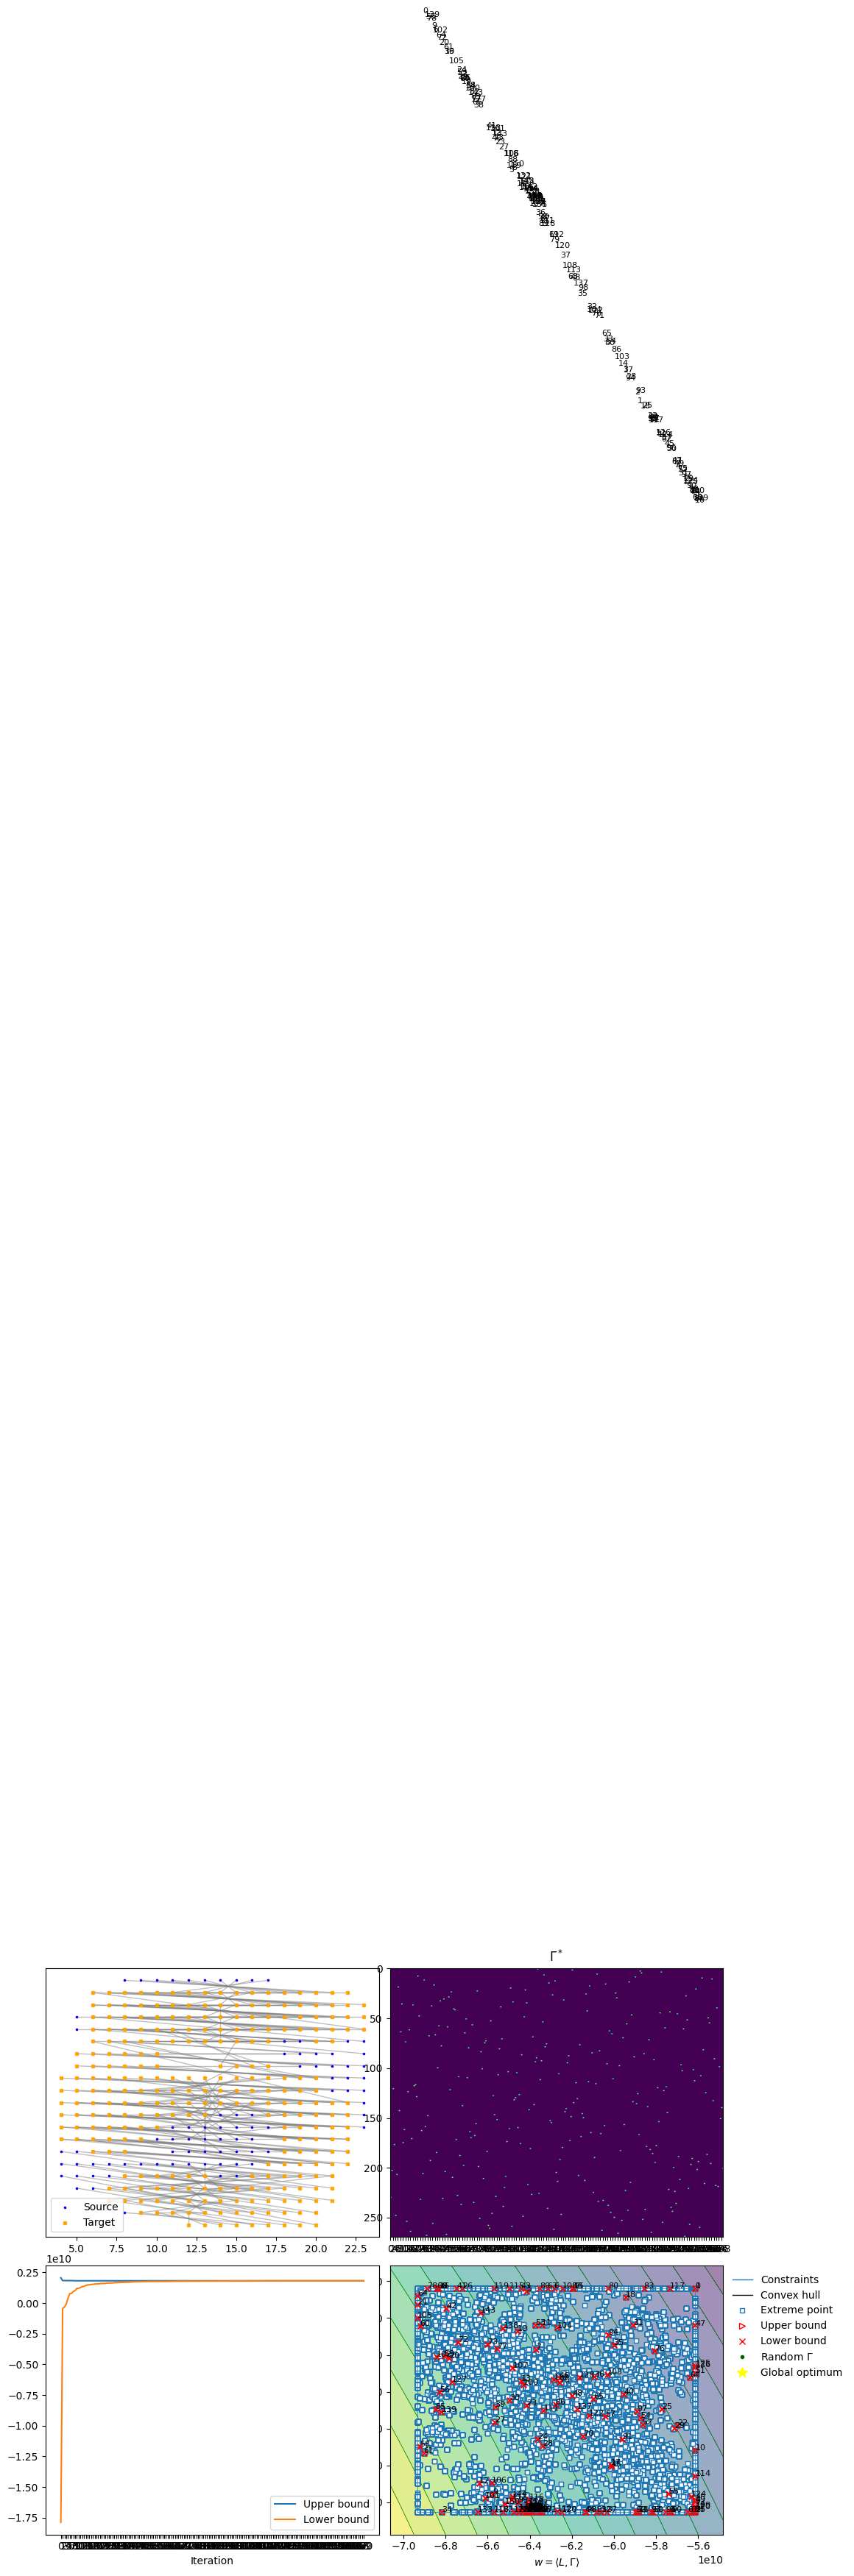

In [5]:
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D


# datas = [df_jump1, df_jump2, df_punch1, df_punch2, df_sit, df_wave]

X = df_2_chosen.values
Y = df_5_chosen.values

P_ggw_sinkhorn,logs_sinkhorn = gw_global(X,Y,epsilon=1e-6,verbose=True,IterMax=500,log=True)

############## CUMA BEDA DISINI
print("Computation time used: ",sum(logs_sinkhorn['time_cache']))

# scatter plot X and Y
plt.figure(figsize=(9.5,8))
plt.subplot(2,2,1)
plt.scatter(X[:,0], X[:,1], color='blue', label='Source', marker='.', s=10)
plt.scatter(Y[:,0], Y[:,1], color='orange', label='Target', marker='X', s=10)

# plt.tight_layout()
# plt.show()

for i in range(len(X)):
    for j in range(len(Y)):
        if P_ggw_sinkhorn[i,j]>0:
            plt.plot([X[i][0], Y[j][0]], [X[i][1], Y[j][1]],color='gray',zorder=-4,linewidth=1,alpha=0.5)
plt.legend()
plt.yticks([])
plt.tight_layout()

# optimization plots with the bounding box and linear constraints
ax4 = plt.subplot(2,2,4)

# BOUNDING BOX
for i,E in enumerate(logs_sinkhorn['E_cache']):
    plt.scatter(E[:,0],E[:,1],alpha=1,marker='s',facecolor='white',s=20,label=f'iter {i}',color='C0')

# c_cache.append((lower_bounds,upper_bounds)) 
for i,c in enumerate(logs_sinkhorn['c_cache']):
    if i == 0:
        lower_bounds,upper_bounds=c
        width = upper_bounds[0] - lower_bounds[0]
        height = upper_bounds[1] - lower_bounds[1]
        plt.plot([lower_bounds[0],upper_bounds[0],upper_bounds[0],lower_bounds[0],lower_bounds[0]],[lower_bounds[1],lower_bounds[1],upper_bounds[1],upper_bounds[1],lower_bounds[1]],label='Bounding box',linewidth=0.5,color='C0')
    else:
        A,b=c
        if A[1] == 0:
            plt.plot([b,b],[lower_bounds[1]-0.1*height,upper_bounds[1]+0.1*height],linewidth=0.5,color='C0')
        else:
            x = np.array([lower_bounds[0]-0.1*width,upper_bounds[0]+0.1*width])
            y = (b - A[0] * x)/A[1]
            plt.plot(x,y,linewidth=0.5,color='C0')


plt.xlim(lower_bounds[0]-0.1*width,upper_bounds[0]+0.1*width)
plt.ylim(lower_bounds[1]-0.1*height,upper_bounds[1]+0.1*height)

for i,E0 in enumerate(logs_sinkhorn['E0_cache']):
    plt.scatter(E0[0],E0[1],marker='x',s=30,color='red')
    plt.text(E0[0],E0[1],f'{i}',fontsize=8)    

L = logs_sinkhorn['L']

for i,P in enumerate(logs_sinkhorn['Pi_cache'][:-1]):
    W = np.sum(2 * X.T @ P @ Y)
    w = np.sum(L*P)
    plt.scatter(w,W,color='red',marker='>',facecolor='white',s=50)
    plt.text(w,W,f'{i}',fontsize=8)  

P = logs_sinkhorn['Pi_cache'][-1]
W = np.sum(2 * X.T @ P @ Y)
w = np.sum(L*P)
plt.scatter(w,W,color='yellow',marker='*',facecolor='yellow',s=100,zorder=15)

Ws = [W]
ws = [w]
M = 1000
for _ in range(M):
    n = len(X)
    perm = np.random.permutation(n)
    mat = np.zeros((n, n), dtype=int)
    for i in range(n):
        mat[i, perm[i]] = 1
    P1 = mat
    i = np.random.choice(len(logs_sinkhorn['Pi_cache']))
    P = logs_sinkhorn['Pi_cache'][i]
    a = (np.random.choice(5)/5)**3
    Pi = (a) * P + (1-a) * P1
    W = np.sum(2 * X.T @ Pi @ Y)
    w = np.sum(L*Pi)
    Ws.append(W)
    ws.append(w)
    
for _ in range(M):
    n = len(X)
    perm = np.random.permutation(n)
    mat = np.zeros((n, n), dtype=int)
    for i in range(n):
        mat[i, perm[i]] = 1
    Pi = mat
    W = np.sum(2 * X.T @ Pi @ Y)
    w = np.sum(L*Pi)
    Ws.append(W)
    ws.append(w)
    
points = np.array(list(zip(ws, Ws)))
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], color='k',zorder=-12,linewidth=1)
    plt.scatter(points[simplex, 0], points[simplex, 1],marker='o',s=10,zorder=-15,edgecolors=[(0, 0.5, 0, 1)],facecolors=[(0, 0.5, 0, 1)])

plt.scatter(ws[::10],Ws[::10],marker='o',s=10,zorder=-15,edgecolors=[(0, 0.5, 0, 1)],facecolors=[(0, 0.5, 0, 1)])

x = np.linspace(lower_bounds[0]-0.1*width, upper_bounds[0]+0.1*width, 400)
y = np.linspace(lower_bounds[1]-0.1*height, upper_bounds[1]+0.1*height, 400)
x, y = np.meshgrid(x, y)
z = -x-y**2

plt.contour(x, y, z, levels=20, colors='green', linewidths=0.5,zorder=-5) 
plt.contourf(x, y, z, levels=20,zorder=-10,alpha=0.5) 

plt.xlabel(r'$w = \langle L,\Gamma \rangle$')
plt.ylabel(r'$W = 2X\Gamma Y^T$')


handles = [
    Line2D([0], [0], color='C0', lw=1, label='Constraints'),
    Line2D([0], [0], color='k', lw=1, label='Convex hull'),
    Line2D([0], [0], marker='s',lw=0,color='C0',markerfacecolor='white',markersize=5, label='Extreme point'),
    Line2D([0], [0], marker='>',lw=0,color='red',markersize=6, markerfacecolor='white',label='Upper bound'),
    Line2D([0], [0], marker='x',lw=0,color='red',markersize=6, label='Lower bound'),
    Line2D([0], [0], marker='o',lw=0,color='darkgreen',markersize=3, label='Random $\Gamma$'),
    Line2D([0], [0], marker='*',lw=0,color='yellow',markersize=10, label='Global optimum')
]

ax4.legend(handles=handles,loc='upper left', bbox_to_anchor=(1,1),frameon=False)
plt.tight_layout()

plt.subplot(2,2,3)
plt.plot(range(logs_sinkhorn['niter']),logs_sinkhorn['u_cache'],label='Upper bound')
plt.plot(range(logs_sinkhorn['niter']),logs_sinkhorn['l_cache'],label='Lower bound')
plt.xticks(range(logs_sinkhorn['niter']))
           
plt.xlabel('Iteration')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(2,2,2)
plt.imshow(P_ggw_sinkhorn)
plt.xticks(range(0,n,2))
plt.title("$\Gamma^*$")
ax2.set_aspect('auto')
plt.tight_layout()

Iter |Bound gap
----------------------
    0|2.734120e+05
    1|1.116744e+04
    2|1.100020e+04
    3|9.565803e+03
    4|8.460939e+03
    5|1.054453e+02
    6|8.060547e+01
    7|1.245703e+01
    8|7.224609e+00
    9|9.765625e-03
   10|0.000000e+00
Computation time used:  0.0860748291015625


/var/folders/rg/6_hb8rjj4tlct__31r7vx4640000gp/T/ipykernel_14148/3744979331.py:138: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
/var/folders/rg/6_hb8rjj4tlct__31r7vx4640000gp/T/ipykernel_14148/3744979331.py:147: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
/var/folders/rg/6_hb8rjj4tlct__31r7vx4640000gp/T/ipykernel_14148/3744979331.py:154: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


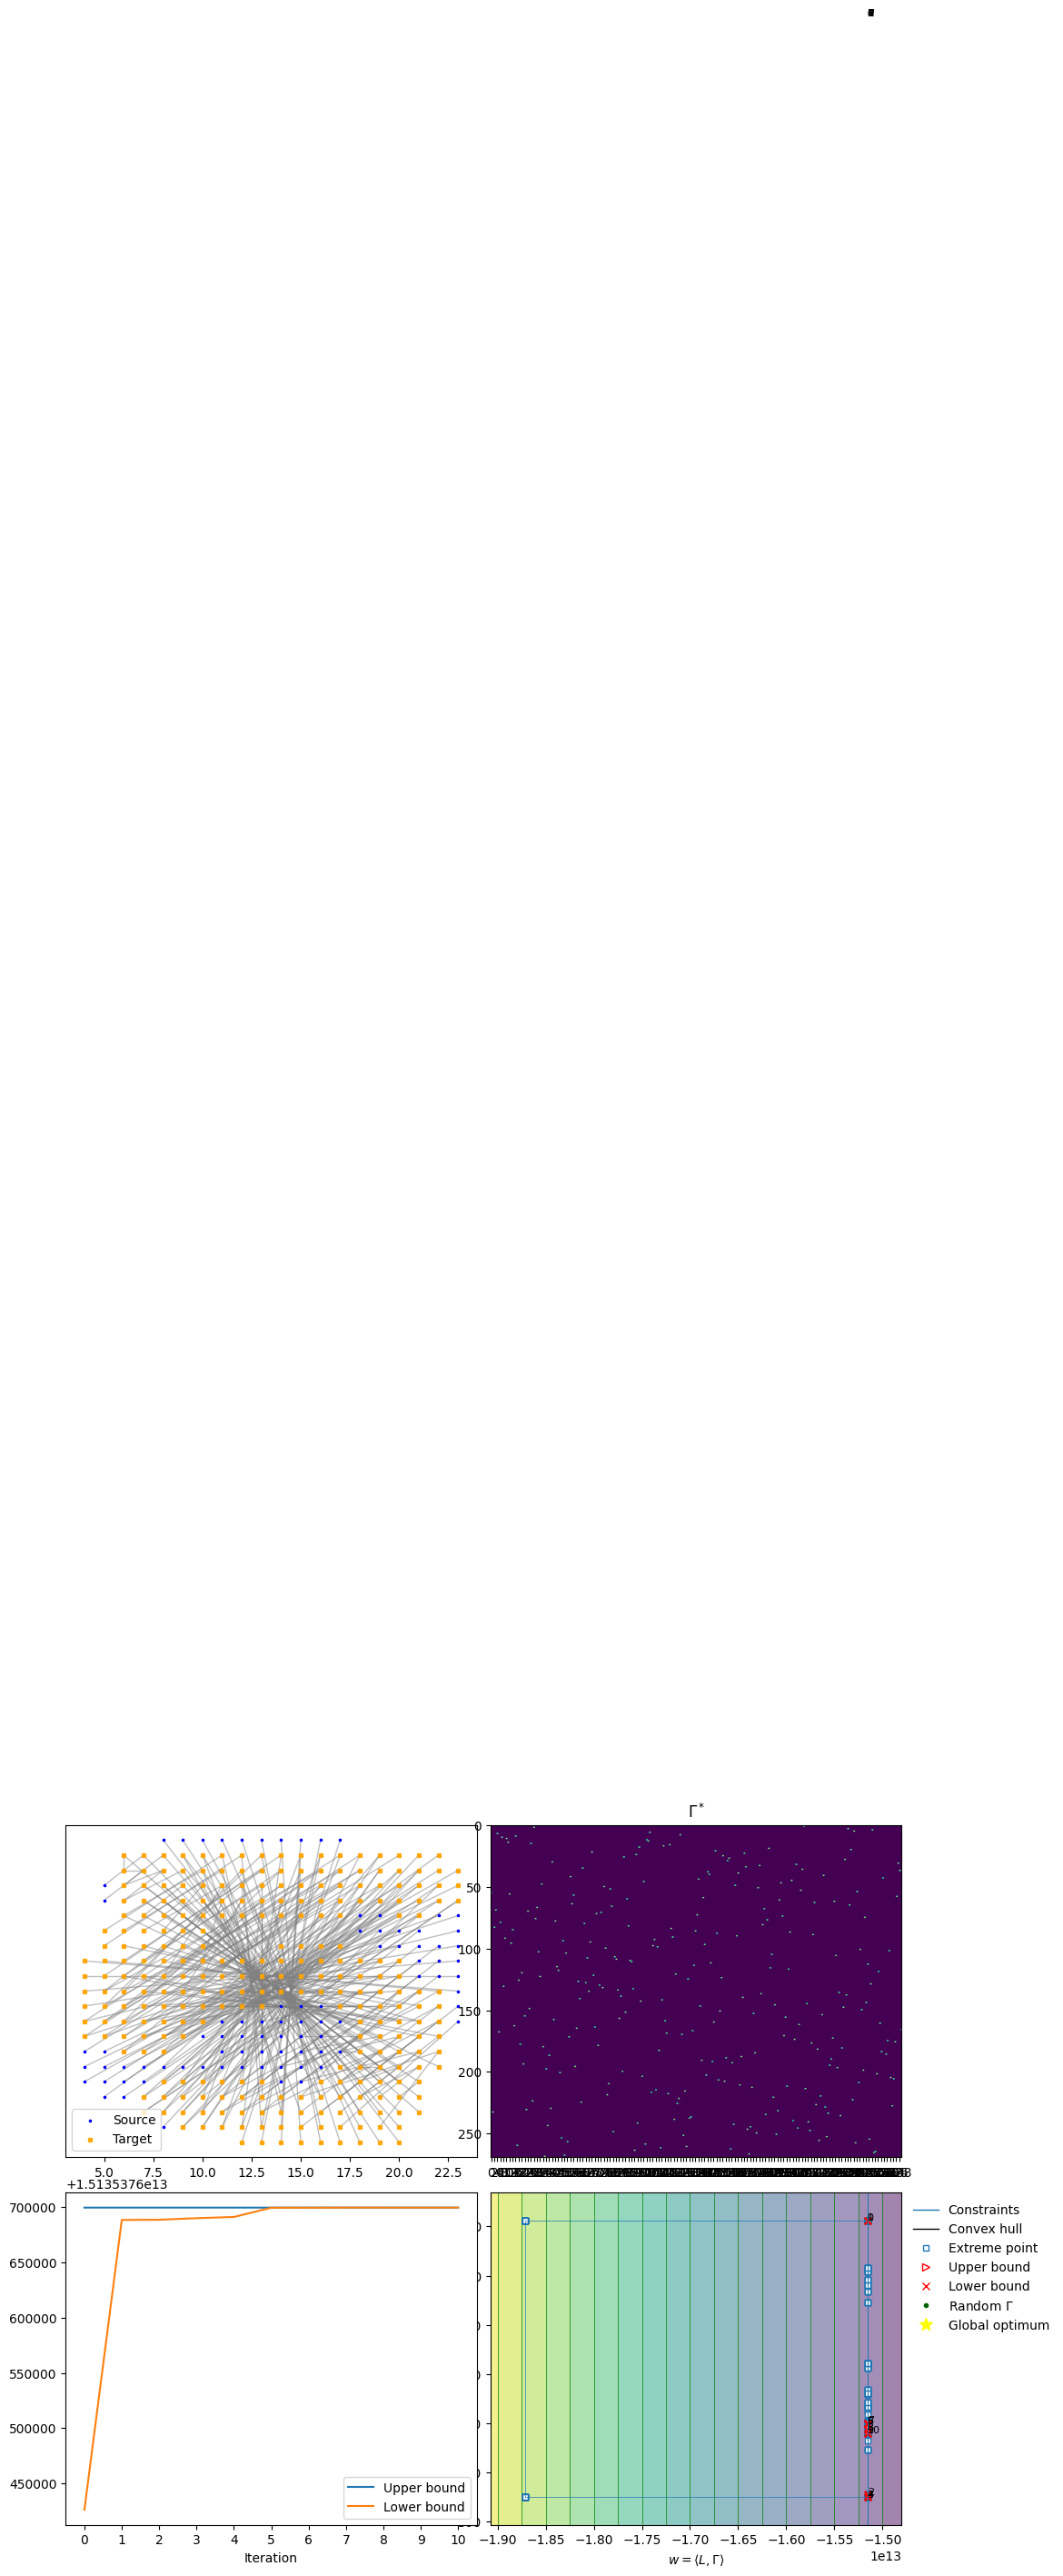

In [6]:
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D


# datas = [df_jump1, df_jump2, df_punch1, df_punch2, df_sit, df_wave]

X = df_2_chosen.values
Y = df_5_chosen.values

P_ggw_sinkhorn,logs_sinkhorn = gw_global_normalized(X,Y,epsilon=1e-6,verbose=True,IterMax=500,log=True)

############## CUMA BEDA DISINI
print("Computation time used: ",sum(logs_sinkhorn['time_cache']))

# scatter plot X and Y
plt.figure(figsize=(9.5,8))
plt.subplot(2,2,1)
plt.scatter(X[:,0], X[:,1], color='blue', label='Source', marker='.', s=10)
plt.scatter(Y[:,0], Y[:,1], color='orange', label='Target', marker='X', s=10)

# plt.tight_layout()
# plt.show()

for i in range(len(X)):
    for j in range(len(Y)):
        if P_ggw_sinkhorn[i,j]>0:
            plt.plot([X[i][0], Y[j][0]], [X[i][1], Y[j][1]],color='gray',zorder=-4,linewidth=1,alpha=0.5)
plt.legend()
plt.yticks([])
plt.tight_layout()

# optimization plots with the bounding box and linear constraints
ax4 = plt.subplot(2,2,4)

# BOUNDING BOX
for i,E in enumerate(logs_sinkhorn['E_cache']):
    plt.scatter(E[:,0],E[:,1],alpha=1,marker='s',facecolor='white',s=20,label=f'iter {i}',color='C0')

# c_cache.append((lower_bounds,upper_bounds)) 
for i,c in enumerate(logs_sinkhorn['c_cache']):
    if i == 0:
        lower_bounds,upper_bounds=c
        width = upper_bounds[0] - lower_bounds[0]
        height = upper_bounds[1] - lower_bounds[1]
        plt.plot([lower_bounds[0],upper_bounds[0],upper_bounds[0],lower_bounds[0],lower_bounds[0]],[lower_bounds[1],lower_bounds[1],upper_bounds[1],upper_bounds[1],lower_bounds[1]],label='Bounding box',linewidth=0.5,color='C0')
    else:
        A,b=c
        if A[1] == 0:
            plt.plot([b,b],[lower_bounds[1]-0.1*height,upper_bounds[1]+0.1*height],linewidth=0.5,color='C0')
        else:
            x = np.array([lower_bounds[0]-0.1*width,upper_bounds[0]+0.1*width])
            y = (b - A[0] * x)/A[1]
            plt.plot(x,y,linewidth=0.5,color='C0')


plt.xlim(lower_bounds[0]-0.1*width,upper_bounds[0]+0.1*width)
plt.ylim(lower_bounds[1]-0.1*height,upper_bounds[1]+0.1*height)

for i,E0 in enumerate(logs_sinkhorn['E0_cache']):
    plt.scatter(E0[0],E0[1],marker='x',s=30,color='red')
    plt.text(E0[0],E0[1],f'{i}',fontsize=8)    

L = logs_sinkhorn['L']

for i,P in enumerate(logs_sinkhorn['Pi_cache'][:-1]):
    W = np.sum(2 * X.T @ P @ Y)
    w = np.sum(L*P)
    plt.scatter(w,W,color='red',marker='>',facecolor='white',s=50)
    plt.text(w,W,f'{i}',fontsize=8)  

P = logs_sinkhorn['Pi_cache'][-1]
W = np.sum(2 * X.T @ P @ Y)
w = np.sum(L*P)
plt.scatter(w,W,color='yellow',marker='*',facecolor='yellow',s=100,zorder=15)

Ws = [W]
ws = [w]
M = 1000
for _ in range(M):
    n = len(X)
    perm = np.random.permutation(n)
    mat = np.zeros((n, n), dtype=int)
    for i in range(n):
        mat[i, perm[i]] = 1
    P1 = mat
    i = np.random.choice(len(logs_sinkhorn['Pi_cache']))
    P = logs_sinkhorn['Pi_cache'][i]
    a = (np.random.choice(5)/5)**3
    Pi = (a) * P + (1-a) * P1
    W = np.sum(2 * X.T @ Pi @ Y)
    w = np.sum(L*Pi)
    Ws.append(W)
    ws.append(w)
    
for _ in range(M):
    n = len(X)
    perm = np.random.permutation(n)
    mat = np.zeros((n, n), dtype=int)
    for i in range(n):
        mat[i, perm[i]] = 1
    Pi = mat
    W = np.sum(2 * X.T @ Pi @ Y)
    w = np.sum(L*Pi)
    Ws.append(W)
    ws.append(w)
    
points = np.array(list(zip(ws, Ws)))
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], color='k',zorder=-12,linewidth=1)
    plt.scatter(points[simplex, 0], points[simplex, 1],marker='o',s=10,zorder=-15,edgecolors=[(0, 0.5, 0, 1)],facecolors=[(0, 0.5, 0, 1)])

plt.scatter(ws[::10],Ws[::10],marker='o',s=10,zorder=-15,edgecolors=[(0, 0.5, 0, 1)],facecolors=[(0, 0.5, 0, 1)])

x = np.linspace(lower_bounds[0]-0.1*width, upper_bounds[0]+0.1*width, 400)
y = np.linspace(lower_bounds[1]-0.1*height, upper_bounds[1]+0.1*height, 400)
x, y = np.meshgrid(x, y)
z = -x-y**2

plt.contour(x, y, z, levels=20, colors='green', linewidths=0.5,zorder=-5) 
plt.contourf(x, y, z, levels=20,zorder=-10,alpha=0.5) 

plt.xlabel(r'$w = \langle L,\Gamma \rangle$')
plt.ylabel(r'$W = 2X\Gamma Y^T$')


handles = [
    Line2D([0], [0], color='C0', lw=1, label='Constraints'),
    Line2D([0], [0], color='k', lw=1, label='Convex hull'),
    Line2D([0], [0], marker='s',lw=0,color='C0',markerfacecolor='white',markersize=5, label='Extreme point'),
    Line2D([0], [0], marker='>',lw=0,color='red',markersize=6, markerfacecolor='white',label='Upper bound'),
    Line2D([0], [0], marker='x',lw=0,color='red',markersize=6, label='Lower bound'),
    Line2D([0], [0], marker='o',lw=0,color='darkgreen',markersize=3, label='Random $\Gamma$'),
    Line2D([0], [0], marker='*',lw=0,color='yellow',markersize=10, label='Global optimum')
]

ax4.legend(handles=handles,loc='upper left', bbox_to_anchor=(1,1),frameon=False)
plt.tight_layout()

plt.subplot(2,2,3)
plt.plot(range(logs_sinkhorn['niter']),logs_sinkhorn['u_cache'],label='Upper bound')
plt.plot(range(logs_sinkhorn['niter']),logs_sinkhorn['l_cache'],label='Lower bound')
plt.xticks(range(logs_sinkhorn['niter']))
           
plt.xlabel('Iteration')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(2,2,2)
plt.imshow(P_ggw_sinkhorn)
plt.xticks(range(0,n,2))
plt.title("$\Gamma^*$")
ax2.set_aspect('auto')
plt.tight_layout()

Iter |Bound gap
----------------------
    0|1.992685e+10
    1|2.266376e+09
    2|2.156267e+09
    3|1.930290e+09
    4|1.436316e+09
    5|1.056895e+09
    6|1.045617e+09
    7|8.789524e+08
    8|7.982276e+08
    9|6.165691e+08
   10|6.148932e+08
   11|5.400076e+08
   12|4.844402e+08
   13|4.493938e+08
   14|3.754367e+08
   15|3.406628e+08
   16|3.237967e+08
   17|3.060117e+08
   18|2.887174e+08
   19|2.715465e+08
   20|2.531407e+08
   21|2.505616e+08
   22|2.284552e+08
   23|2.218982e+08
   24|2.187068e+08
   25|2.134754e+08
   26|1.905197e+08
   27|1.856696e+08
   28|1.849007e+08
   29|1.779302e+08
   30|1.520066e+08
   31|1.495572e+08
   32|1.448646e+08
   33|1.355773e+08
   34|1.320235e+08
   35|1.262674e+08
   36|1.252928e+08
   37|1.151485e+08
   38|1.135603e+08
   39|1.016417e+08
   40|9.804941e+07
   41|8.346094e+07
   42|7.820579e+07
   43|7.791492e+07
   44|7.183851e+07
   45|7.176724e+07
   46|6.809176e+07
   47|6.447276e+07
   48|6.374941e+07
   49|6.045111e+07
   50|5.730

/var/folders/rg/6_hb8rjj4tlct__31r7vx4640000gp/T/ipykernel_14148/1078259085.py:138: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
/var/folders/rg/6_hb8rjj4tlct__31r7vx4640000gp/T/ipykernel_14148/1078259085.py:147: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
/var/folders/rg/6_hb8rjj4tlct__31r7vx4640000gp/T/ipykernel_14148/1078259085.py:154: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


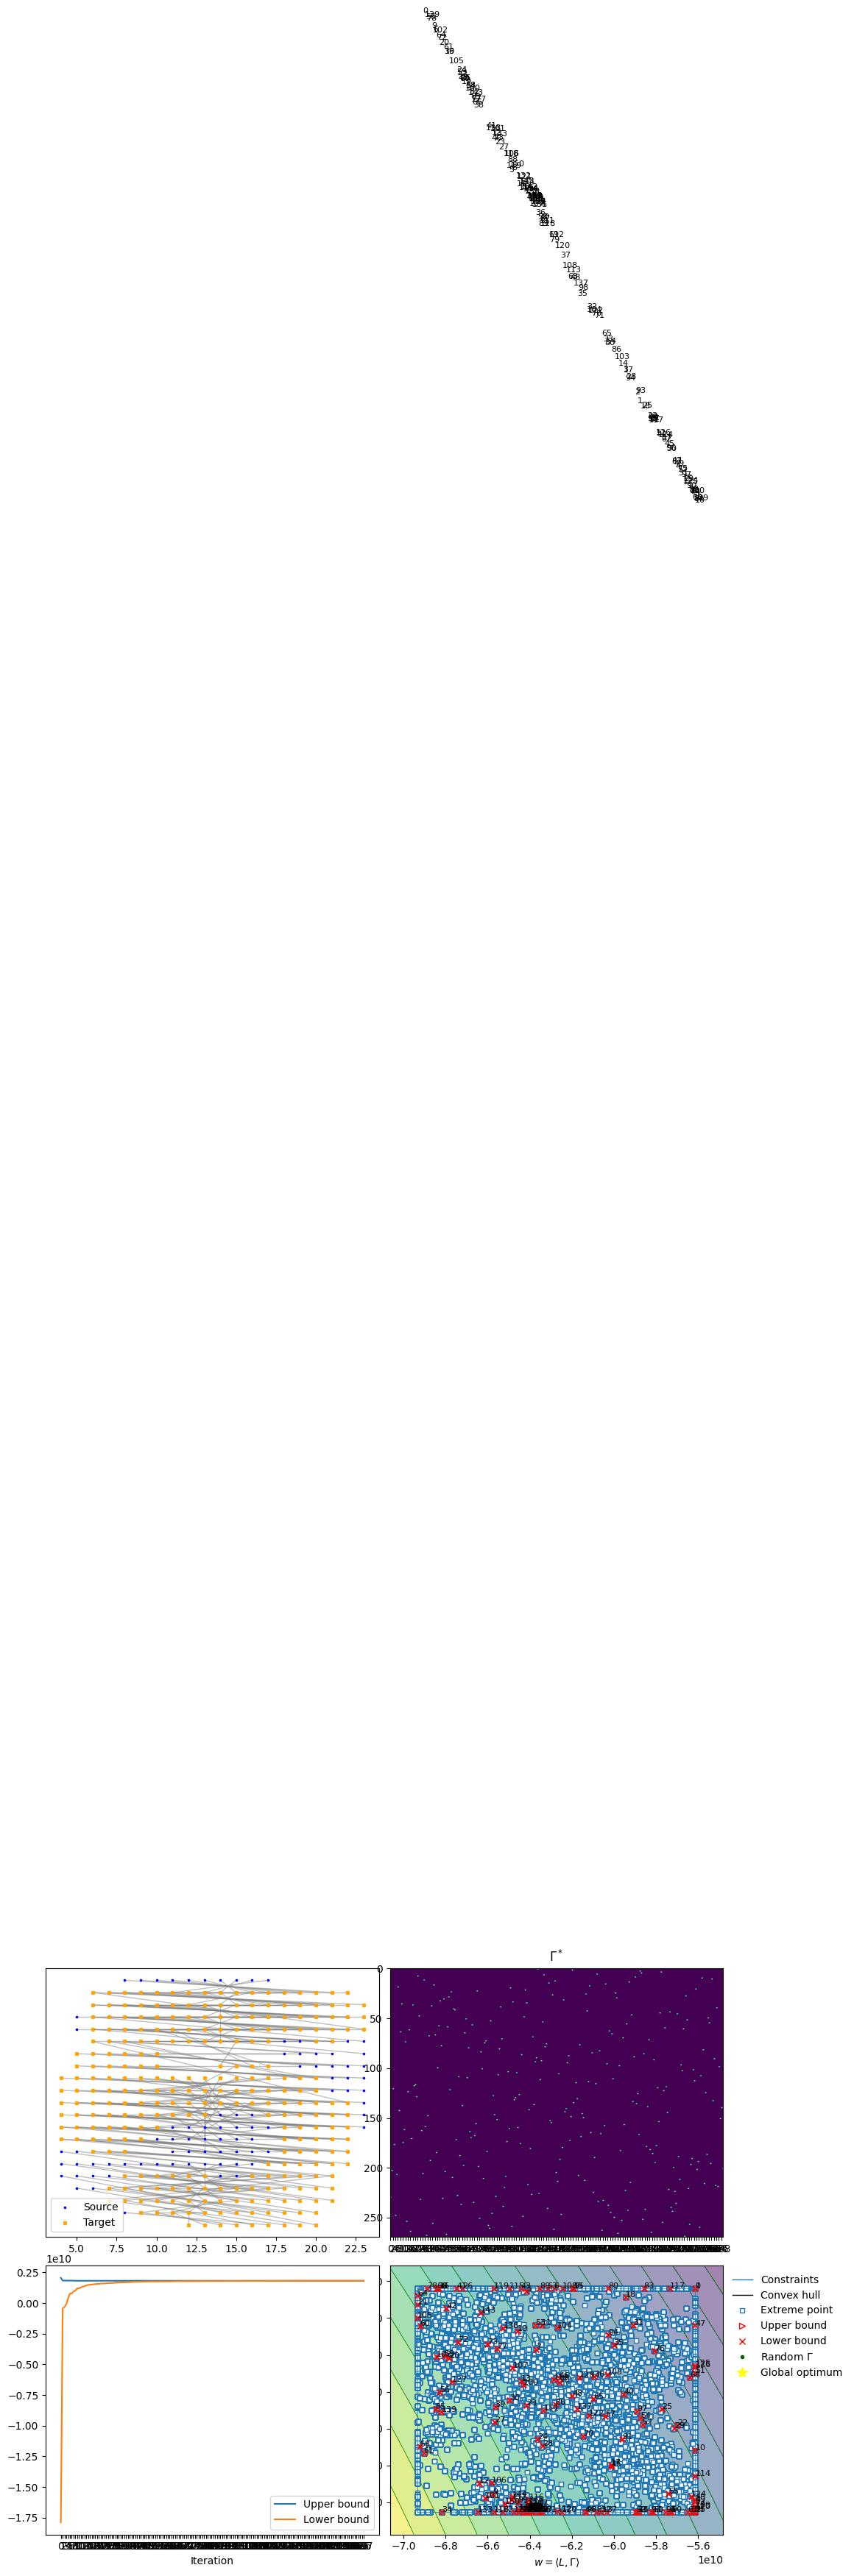

In [7]:
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D


# datas = [df_jump1, df_jump2, df_punch1, df_punch2, df_sit, df_wave]

X = df_2_chosen.values
Y = df_5_chosen.values

P_ggw_sinkhorn,logs_sinkhorn = gw_global_testing(X,Y,epsilon=1e-6,verbose=True,IterMax=500,log=True)

############## CUMA BEDA DISINI
print("Computation time used: ",sum(logs_sinkhorn['time_cache']))

# scatter plot X and Y
plt.figure(figsize=(9.5,8))
plt.subplot(2,2,1)
plt.scatter(X[:,0], X[:,1], color='blue', label='Source', marker='.', s=10)
plt.scatter(Y[:,0], Y[:,1], color='orange', label='Target', marker='X', s=10)

# plt.tight_layout()
# plt.show()

for i in range(len(X)):
    for j in range(len(Y)):
        if P_ggw_sinkhorn[i,j]>0:
            plt.plot([X[i][0], Y[j][0]], [X[i][1], Y[j][1]],color='gray',zorder=-4,linewidth=1,alpha=0.5)
plt.legend()
plt.yticks([])
plt.tight_layout()

# optimization plots with the bounding box and linear constraints
ax4 = plt.subplot(2,2,4)

# BOUNDING BOX
for i,E in enumerate(logs_sinkhorn['E_cache']):
    plt.scatter(E[:,0],E[:,1],alpha=1,marker='s',facecolor='white',s=20,label=f'iter {i}',color='C0')

# c_cache.append((lower_bounds,upper_bounds)) 
for i,c in enumerate(logs_sinkhorn['c_cache']):
    if i == 0:
        lower_bounds,upper_bounds=c
        width = upper_bounds[0] - lower_bounds[0]
        height = upper_bounds[1] - lower_bounds[1]
        plt.plot([lower_bounds[0],upper_bounds[0],upper_bounds[0],lower_bounds[0],lower_bounds[0]],[lower_bounds[1],lower_bounds[1],upper_bounds[1],upper_bounds[1],lower_bounds[1]],label='Bounding box',linewidth=0.5,color='C0')
    else:
        A,b=c
        if A[1] == 0:
            plt.plot([b,b],[lower_bounds[1]-0.1*height,upper_bounds[1]+0.1*height],linewidth=0.5,color='C0')
        else:
            x = np.array([lower_bounds[0]-0.1*width,upper_bounds[0]+0.1*width])
            y = (b - A[0] * x)/A[1]
            plt.plot(x,y,linewidth=0.5,color='C0')


plt.xlim(lower_bounds[0]-0.1*width,upper_bounds[0]+0.1*width)
plt.ylim(lower_bounds[1]-0.1*height,upper_bounds[1]+0.1*height)

for i,E0 in enumerate(logs_sinkhorn['E0_cache']):
    plt.scatter(E0[0],E0[1],marker='x',s=30,color='red')
    plt.text(E0[0],E0[1],f'{i}',fontsize=8)    

L = logs_sinkhorn['L']

for i,P in enumerate(logs_sinkhorn['Pi_cache'][:-1]):
    W = np.sum(2 * X.T @ P @ Y)
    w = np.sum(L*P)
    plt.scatter(w,W,color='red',marker='>',facecolor='white',s=50)
    plt.text(w,W,f'{i}',fontsize=8)  

P = logs_sinkhorn['Pi_cache'][-1]
W = np.sum(2 * X.T @ P @ Y)
w = np.sum(L*P)
plt.scatter(w,W,color='yellow',marker='*',facecolor='yellow',s=100,zorder=15)

Ws = [W]
ws = [w]
M = 1000
for _ in range(M):
    n = len(X)
    perm = np.random.permutation(n)
    mat = np.zeros((n, n), dtype=int)
    for i in range(n):
        mat[i, perm[i]] = 1
    P1 = mat
    i = np.random.choice(len(logs_sinkhorn['Pi_cache']))
    P = logs_sinkhorn['Pi_cache'][i]
    a = (np.random.choice(5)/5)**3
    Pi = (a) * P + (1-a) * P1
    W = np.sum(2 * X.T @ Pi @ Y)
    w = np.sum(L*Pi)
    Ws.append(W)
    ws.append(w)
    
for _ in range(M):
    n = len(X)
    perm = np.random.permutation(n)
    mat = np.zeros((n, n), dtype=int)
    for i in range(n):
        mat[i, perm[i]] = 1
    Pi = mat
    W = np.sum(2 * X.T @ Pi @ Y)
    w = np.sum(L*Pi)
    Ws.append(W)
    ws.append(w)
    
points = np.array(list(zip(ws, Ws)))
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], color='k',zorder=-12,linewidth=1)
    plt.scatter(points[simplex, 0], points[simplex, 1],marker='o',s=10,zorder=-15,edgecolors=[(0, 0.5, 0, 1)],facecolors=[(0, 0.5, 0, 1)])

plt.scatter(ws[::10],Ws[::10],marker='o',s=10,zorder=-15,edgecolors=[(0, 0.5, 0, 1)],facecolors=[(0, 0.5, 0, 1)])

x = np.linspace(lower_bounds[0]-0.1*width, upper_bounds[0]+0.1*width, 400)
y = np.linspace(lower_bounds[1]-0.1*height, upper_bounds[1]+0.1*height, 400)
x, y = np.meshgrid(x, y)
z = -x-y**2

plt.contour(x, y, z, levels=20, colors='green', linewidths=0.5,zorder=-5) 
plt.contourf(x, y, z, levels=20,zorder=-10,alpha=0.5) 

plt.xlabel(r'$w = \langle L,\Gamma \rangle$')
plt.ylabel(r'$W = 2X\Gamma Y^T$')


handles = [
    Line2D([0], [0], color='C0', lw=1, label='Constraints'),
    Line2D([0], [0], color='k', lw=1, label='Convex hull'),
    Line2D([0], [0], marker='s',lw=0,color='C0',markerfacecolor='white',markersize=5, label='Extreme point'),
    Line2D([0], [0], marker='>',lw=0,color='red',markersize=6, markerfacecolor='white',label='Upper bound'),
    Line2D([0], [0], marker='x',lw=0,color='red',markersize=6, label='Lower bound'),
    Line2D([0], [0], marker='o',lw=0,color='darkgreen',markersize=3, label='Random $\Gamma$'),
    Line2D([0], [0], marker='*',lw=0,color='yellow',markersize=10, label='Global optimum')
]

ax4.legend(handles=handles,loc='upper left', bbox_to_anchor=(1,1),frameon=False)
plt.tight_layout()

plt.subplot(2,2,3)
plt.plot(range(logs_sinkhorn['niter']),logs_sinkhorn['u_cache'],label='Upper bound')
plt.plot(range(logs_sinkhorn['niter']),logs_sinkhorn['l_cache'],label='Lower bound')
plt.xticks(range(logs_sinkhorn['niter']))
           
plt.xlabel('Iteration')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(2,2,2)
plt.imshow(P_ggw_sinkhorn)
plt.xticks(range(0,n,2))
plt.title("$\Gamma^*$")
ax2.set_aspect('auto')
plt.tight_layout()